# NYC AirBnb Dataset Analysis

This project analyzed the NYC AirBnB dataset to uncover insights and build predictive models, demonstrating a full spectrum of data sciene techniques learned over the semester.

## Step 1: Problem Definition & Data Understanding

**Objective**
Define a clear problem and explore the dataset's structure and characteristics.

**What is Being Done**
- **Problem**: Predict Airbnb listing prices (regression) and classify listing popularity (classification), using features like location, room type, and reviews.
- **Data Exploration**: Load the dataset, examine its structure, summarize key variables, and visualize distributions to identify patterns and issues.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (downloaded from Kaggle)
df = pd.read_csv("../data/airbnb_nyc_raw.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Dataset structure**

In [3]:
print("Shape: ",df.shape)
print("Column Types:\n", df.dtypes)

Shape:  (48895, 16)
Column Types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


Get the Missing values


In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Summary statistics**

In [5]:
# Numerical summary
print(df.describe())

# Categorical unique counts
for col in ['neighbourhood_group', 'room_type']:
    print(f"{col}: {df[col].nunique()} unique values")

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

**Price distribution**

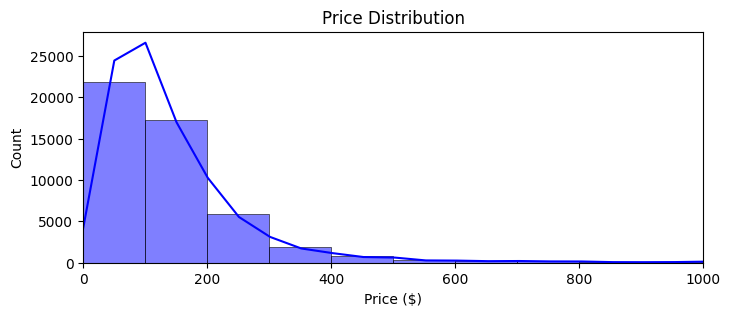

In [ ]:
# Histogram
plt.figure(figsize=(8, 3))
sns.histplot(df['price'], bins=100, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.xlim(0, 1000)
plt.show()

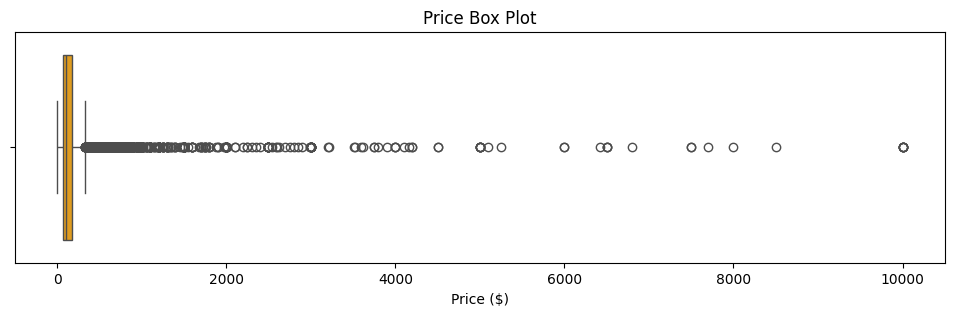

In [7]:

# Box plot
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['price'], color='orange')
plt.title('Price Box Plot')
plt.xlabel('Price ($)')
plt.show()

**Number of Reviews Distribution**

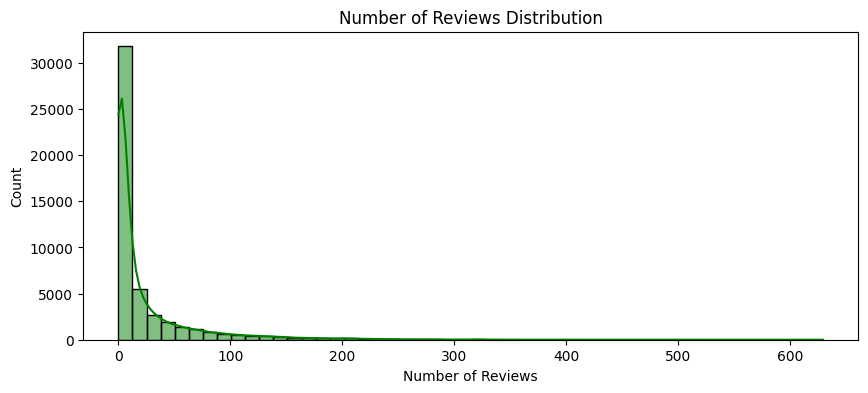

In [8]:
# Histogram
plt.figure(figsize=(10, 4))
sns.histplot(df['number_of_reviews'], bins=50, kde=True, color='green')
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.show()

**Missing values**

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


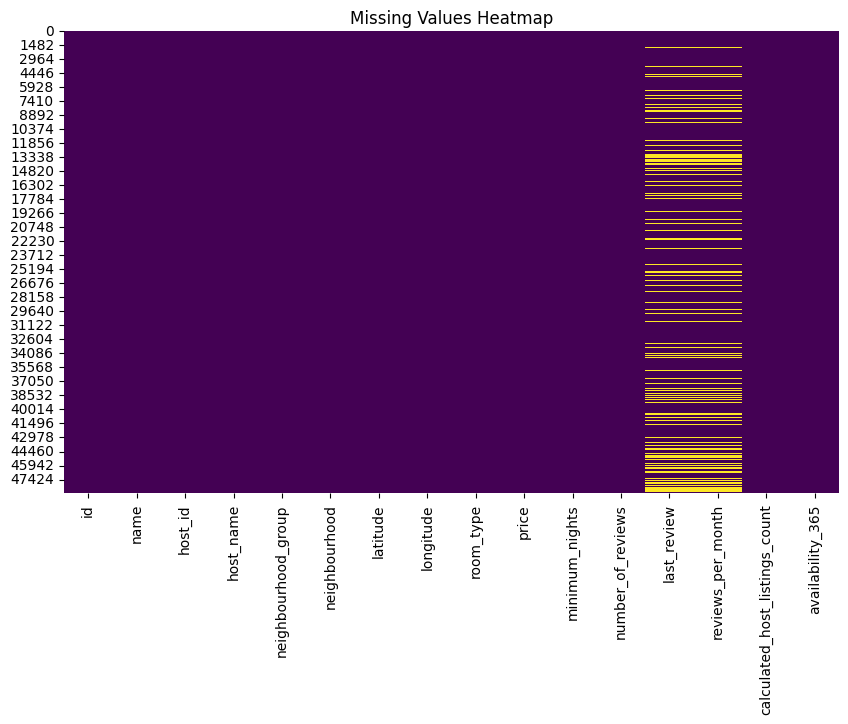

In [9]:
# Missing counts
print(df.isnull().sum()[df.isnull().sum() > 0])

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**Price vs. Number of Reviews**

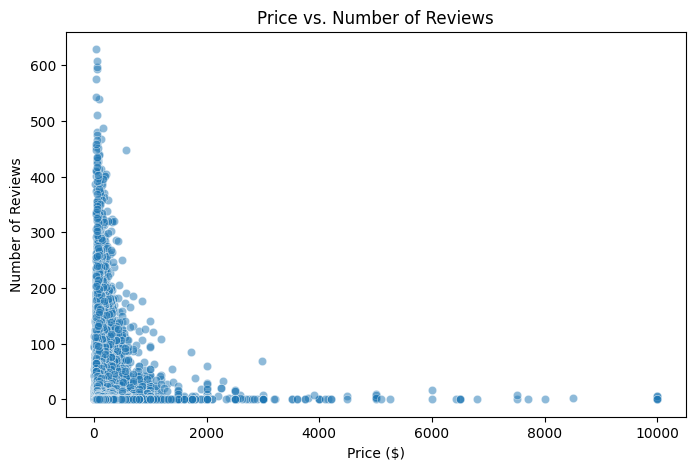

In [10]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(y='number_of_reviews', x='price', data=df, alpha=0.5)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.show()

**Correlation Matrix**

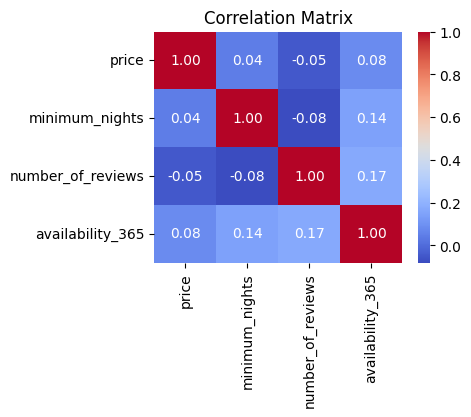

In [11]:
# Correlation heatmap
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Price by Neighborhood Group**

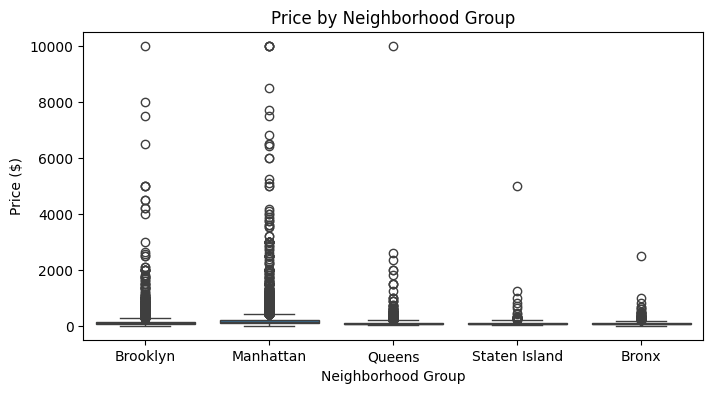

In [12]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price ($)')
plt.show()

**Geographic Distribution**

In [13]:
import plotly.express as px

# Interactive map
fig = px.scatter_map(df,
                     lat='latitude',
                     lon='longitude',
                     color='price',
                     size='number_of_reviews',
                     zoom=10, title='NYC Airbnb Listings by Price')
fig.show()

### Explanation
#### **1. What is being done?**

In the initial step, two primary tasks are undertaken to lay the foundation for the project:
- Defining the Problem:

    - Two specific objectioves are established:

        - **Regression Task**: Predict the price of Airbnb listings in New York City using features such as location, room type, and availability.
        - **Classification Task**: Classify listings as "popular" or "less popular" based on their number of reviews (e.g., above or below the median).

- Exploring the Dateset:
    
    - **Loading the Data**: The NYC AirBnb dataset is loaded into a Pandas DataFrame, and the first five rows are displayed to inspect sample data.
    - **Checking Structure**: The dataset's shape (rows and columns) and column data types are printed to understand its size and composition.
    - **Summary Statistics**: Descriptive statistics are computed for numerical columns (e.g., meanm, min, max of `price`), and unique value counts are obtained for categorical columns (e.g., `neighbourhood_group`, `room_type`).
    - **Visualizing Price Distribution**: A histogram with a kernel density estimate (KDE) and a box plot are created for the `price` column to examine its distribution and identify outliers.
    - **Visualizing Number of Reviews**: A histogram with KDE is plotted for `number_of_reviews` to assess its distribution.
    - **Checking Missing Values**: Missing values are quantified for each column, and a heatmap visualizes their patterns across the dataset.
    - **Exploring Price vs. Reviews**: A scatter plot compares `price` against `number_of_reviews` to investigate potential relationships.
    - **Correlation Analysis**: A correlation matrix for numerical columns (`price`, `minimum_nights`, `number_of_reviews`, `availability_365`) is computed and visualized as a heatmap.
    - **Price by Neighborhood** : A box plot shows `price` distributions across `neighbourhood_group` categories (e.g., Manhattan, Brooklyn).
    - **Geographic Distribution**: An interactive scatter map plots listings by `latitude` and `longitude`, with `price` as color and `number_of_reviews` as size, to explore spatial patterns.

#### **2. Why It Is Done?**

Each action serves a specific purpose to ensure the project starts on a solid foundation:

- **Defining the Problem**:

    - **Regression Task (Price Prediction)**: Predicting `price` is chosen because it’s a continuous variable central to Airbnb’s business model—hosts need competitive pricing, and guests seek affordable options. This aligns with regression techniques, a core component of data science.
    - **Classification Task (Popularity Classification)**: Classifying listings based on `number_of_reviews` introduces a classification problem, diversifying the project’s scope. Popularity reflects demand, which is valuable for understanding market dynamics.
    - **Dual Objectives**: Combining regression and classification showcases a broader skill set, leverages more dataset features, and ensures the project is comprehensive, addressing multiple analytical perspectives.

- **Exploring the Dataset**:
    -Loading the Data: Loading into a DataFrame enables programmatic analysis, while displaying the first rows provides a quick glimpse of column contents (e.g., `price`, `room_type`), helping to contextualize the data.
    - **Checking Structure**: Knowing the dataset’s size (48,895 rows, 16 columns) and data types (e.g., `int64` for `price`, `object` for `neighbourhood_group`) informs preprocessing needs, such as encoding categorical variables or handling numerical outliers.
    - **Summary Statistics**: Calculating statistics reveals central tendencies (e.g., mean `price` ~$152) and anomalies (e.g., max `price` $10,000), while unique counts for categories (e.g., 5 neighborhoods) indicate feature diversity.
    - **Visualizing Price Distribution**: The histogram and box plot for price reveal its shape and outliers, critical for deciding whether transformations (e.g., log-scaling) or outlier removal are needed.
    - **Visualizing Number of Reviews**: The histogram for `number_of_reviews` helps determine how to define "popularity" for classification, as the distribution affects threshold choices.
    - **Checking Missing Values**: Quantifying and visualizing missing data identifies columns needing imputation or exclusion, ensuring data quality for modeling.
    - **Exploring Price vs. Reviews**: The scatter plot tests whether `price` and `number_of_reviews` are related, guiding feature selection for both tasks.
    - **Correlation Analysis**: The heatmap checks for linear relationships among numerical features, informing model choice (e.g., linear vs. non-linear).
    - **Price by Neighborhood**: The box plot examines location’s impact on `price`, a likely key predictor, to confirm its importance.
    - **Geographic Distribution**: The map visualizes spatial patterns, highlighting how `price` and `number_of_reviews` vary by location, which is crucial for feature engineering and interpretation.

#### **3. What Are the Implications and Findings of the Process?**

The actions taken yield critical insights that shape the project’s direction and highlight the dataset’s characteristics:

- **Problem Definition**:
    - **Implications**:
        - The dual focus on price prediction and popularity classification provides a clear roadmap, ensuring the project addresses both regression and classification techniques. This aligns with the semester’s learning objectives, maximizing the demonstration of skills.
        - The regression task leverages `price` as a continuous target, suitable for models like linear regression or XGBoost, while the classification task uses `number_of_reviews` to create a binary outcome, ideal for algorithms like Random Forest or SVM.
    - **Findings**:
        - Price prediction is a practical goal, as it directly relates to Airbnb’s core business—optimizing host revenue and guest satisfaction.
        - Popularity classification adds a demand-side perspective, potentially revealing insights about what makes listings attractive, such as location or price.
- **Exploring the Dataset**:
    - **Implications**:
        - **Structure**: With 48,895 listings and 16 columns, the dataset is large enough for robust machine learning but requires careful handling of diverse data types (numerical, categorical, text).
        - **Preprocessing Needs**: The presence of outliers, missing values, and categorical variables indicates that preprocessing will involve outlier removal, imputation, and encoding to prepare the data for modeling.
        - **Modeling Strategy**: Weak correlations and non-linear patterns suggest that tree-based models (e.g., Random Forest, XGBoost) may outperform linear models, while skewness in `price` may necessitate a log-transformation.
        - **Feature Importance**: Location and room type emerge as likely key predictors, guiding feature selection and engineering efforts.
    - **Findings**:
        - **Loading and Structure**: The dataset includes actionable columns like price (target for regression), number_of_reviews (basis for classification), and features like neighbourhood_group, room_type, latitude, and longitude that can drive predictions.
        - **Summary Statistics**:
            - `price`: Mean ~$152, median ~$106, max $10,000, min $0—extreme values and zeros indicate outliers or errors.
            - `number_of_reviews`: Mean ~23, max 629—most listings have few reviews, supporting a binary classification approach.
            - `neighbourhood_group`: 5 unique values; `room_type`: 3 unique values—manageable for encoding.
        - **Price Distribution**:
            - The histogram shows a right-skewed distribution, with most prices between $50-$300 and a long tail up to $10,000.
            - The box plot identifies outliers above ~$334 (Q3 + 1.5*IQR), suggesting preprocessing to cap or remove these values.
        - **Number of Reviews**:
            - Also right-skewed, with a median around 5-10 reviews, justifying a threshold-based classification (e.g., above median = "popular").
        - **Missing Values**:
            - ~10,052 missing entries in `last_review` and `reviews_per_month` (20% of rows), likely tied to listings with zero reviews, requiring imputation (e.g., 0 for `reviews_per_month`) or careful handling.
            - Minor missingness in `name` and `host_name` is less critical but noted for completeness.
        - **Price vs. Reviews**:
            - The scatter plot shows no strong relationship, indicating that price alone doesn’t drive review counts, and other features (e.g., location, amenities) may be more influential.
        - **Correlation Matrix**:
            - Weak correlations (e.g., price vs. number_of_reviews at -0.05) suggest linear models may struggle, and non-linear or interaction terms could improve performance.
        - **Price by Neighborhood**:
            - Manhattan has the highest median price ($150), followed by Brooklyn ($90), with the Bronx and Queens lower, confirming location as a critical predictor.
        - **Geographic Distribution**:
            - The map highlights high prices in Manhattan and more reviewed listings in Brooklyn/Queens, reinforcing the spatial influence on both price and popularity.

#### **Summary**
This step establishes a clear direction by defining two tasks—predicting price and classifying popularity—while thoroughly exploring the dataset’s structure, distributions, and patterns. The findings highlight preprocessing needs (e.g., outlier handling, encoding), modeling considerations (e.g., non-linear models), and key features (e.g., location), setting a robust foundation for the project.

## Step 2: Data cleaning and Preprocessing

From the above simple initial exploration it is clear than some of the rows `name`, `last_review`, `reviews_per_month` are missing values.

In [21]:
# Handle missing data

# Assume 0 reviews if missing (float datatype)
df.fillna({"reviews_per_month": 0}, inplace=True)

# Empty string for missing names (string )
df.fillna({"name": ""}, inplace=True)

### Visuals of pricing skewness

In [ ]:

# Remove price outiers using IQR (inter quartile range)
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
df = df[(df['price'] >= q1 - 1.5 * iqr) & (df['price'] <= q3 + 1.5 * iqr)]

In [20]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2
